In [2]:
#Hier Module mit !pip installieren


Laden der Daten

In [3]:
import pandas as pd

# Set the path to the BTC-USD.csv file
btc_file_path = r'C:\Users\silas\OneDrive\Desktop\Bachelor Thesis\Model tests und Code\BTC-USD.csv'

# Load the Data
btc_data = pd.read_csv(btc_file_path)

# Set the 'Date' column as the index of the DataFrame
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

# Datenüberprüfungen
print("Erste 5 Zeilen des DataFrames:")
print(btc_data.head())

print("\nLetzte 5 Zeilen des DataFrames:")
print(btc_data.tail())

print("\nDatentypen in jedem Spalten:")
print(btc_data.dtypes)

print("\nAnzahl der Zeilen und Spalten:")
print(btc_data.shape)

print("\nAnzahl der fehlenden Werte in jeder Spalte:")
print(btc_data.isnull().sum())

Erste 5 Zeilen des DataFrames:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-11-15  5736.149902  5774.819824  5358.379883  5648.029785  5648.029785   
2018-11-16  5645.319824  5657.020020  5498.939941  5575.549805  5575.549805   
2018-11-17  5578.580078  5578.580078  5519.560059  5554.330078  5554.330078   
2018-11-18  5559.740234  5653.609863  5559.740234  5623.540039  5623.540039   
2018-11-19  5620.779785  5620.779785  4842.910156  4871.490234  4871.490234   

                Volume  
Date                    
2018-11-15  7032140000  
2018-11-16  5279320000  
2018-11-17  4303150000  
2018-11-18  4159680000  
2018-11-19  7039560000  

Letzte 5 Zeilen des DataFrames:
                    Open          High           Low         Close  \
Date                                                                 
2023-11-11  37310.070313  37407.093750  36773.667969  37138.050781 

Visualisierung der vorhandenen Daten

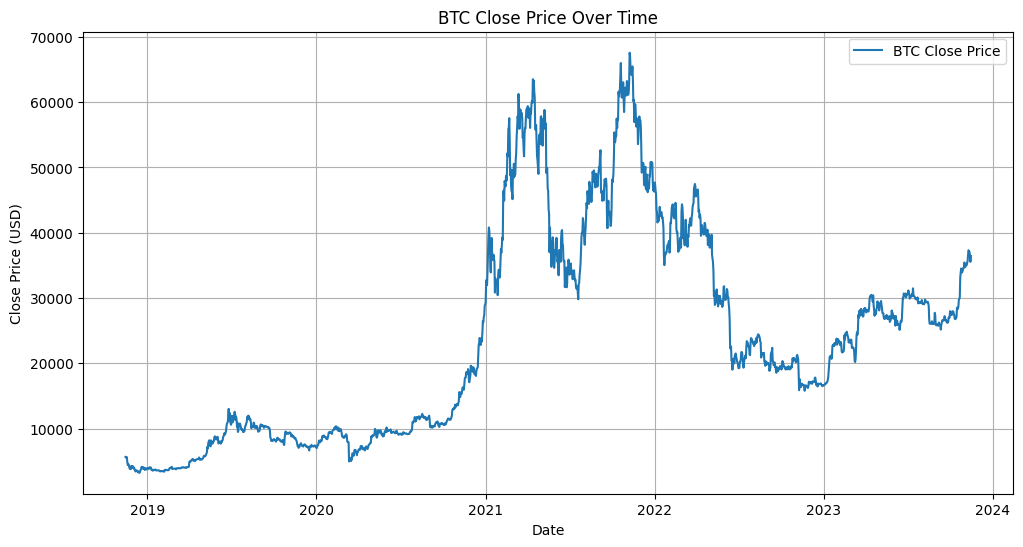

In [4]:
import matplotlib.pyplot as plt

# Plotting the Close Price of BTC
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Close'], label='BTC Close Price')  # Replace 'Close' with the appropriate column name if different
plt.title('BTC Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Berechnung und visualisierung der täglichen, wöchentlichen und monatlichen diskreten (einfachen) Renditen von BTC

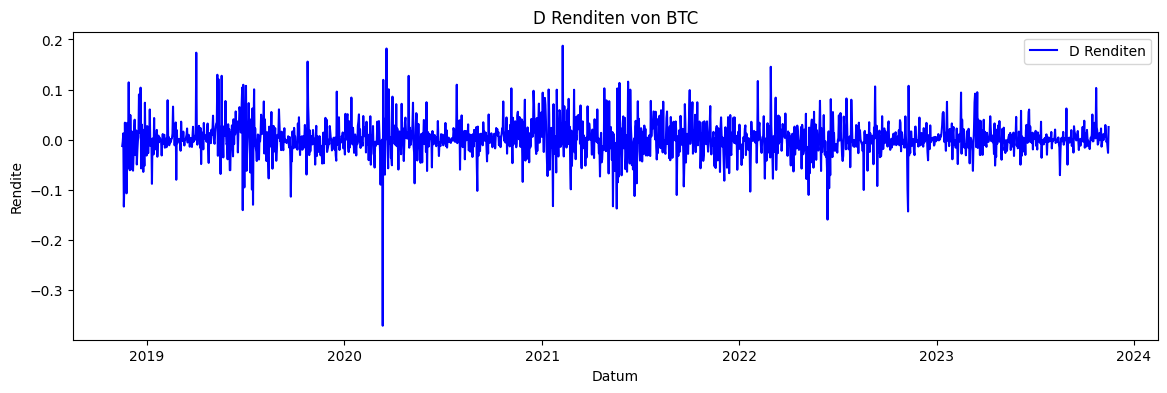

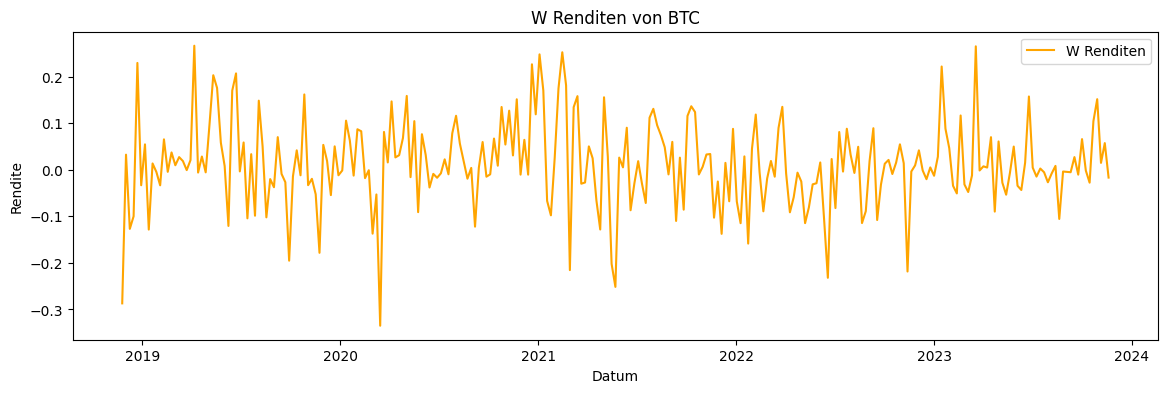

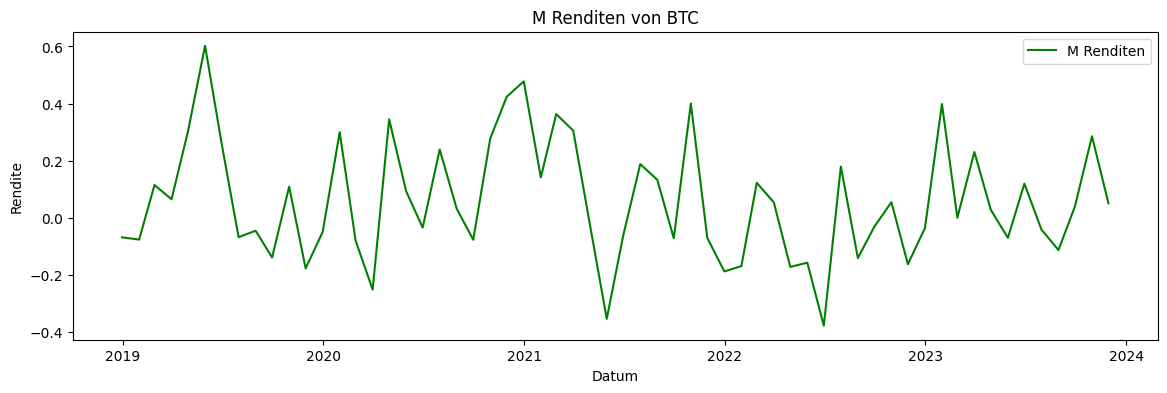

In [5]:
from functions import plot_returns, calculate_returns

# Berechnen und visualisieren der diskreten Renditen für verschiedene Frequenzen
frequencies = [('D', 'blue'), ('W', 'orange'), ('M', 'green')]
for freq, color in frequencies:
    returns = calculate_returns(btc_data, frequency=freq)
    plot_returns(returns, freq, color)

In der folgenden Zelle wird dem Datensatz lediglich eine spalte mit den diskreten und eine spalte mit den log renditen mit der Frequenz D hinzugefügt

In [6]:
from functions import calculate_log_returns

# Erstellen einer Kopie des originalen DataFrames
btc_data_copy = btc_data.copy()

# Berechnung der täglichen diskreten Renditen
daily_returns = calculate_returns(btc_data_copy, frequency='D')

# Berechnung der täglichen logarithmierten Renditen
daily_log_returns = calculate_log_returns(btc_data_copy, frequency='D')

# Hinzufügen der täglichen diskreten und logarithmierten Renditen zum kopierten DataFrame
btc_data_copy['Daily Returns'] = daily_returns
btc_data_copy['Daily Log Returns'] = daily_log_returns

# Überprüfen der ersten Zeilen des modifizierten DataFrames
btc_data_copy.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Log Returns
Date,,,,,,,,
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN
2018-11-16,5645.319824,5657.020020,5498.939941,5575.549805,5575.549805,5279320000,-0.012833,-0.012916
2018-11-17,5578.580078,5578.580078,5519.560059,5554.330078,5554.330078,4303150000,-0.003806,-0.003813
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4159680000,0.012461,0.012384
2018-11-19,5620.779785,5620.779785,4842.910156,4871.490234,4871.490234,7039560000,-0.133732,-0.143561


In der nächsten Zelle wird die Preisdifferenz der BTC Highs von Tag zu Tag in absoluten Zahlen abgebildet und als Spalte dem Datensatz hinzugefügt

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Log Returns,Diff in High
Date,,,,,,,,,
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN
2018-11-16,5645.319824,5657.020020,5498.939941,5575.549805,5575.549805,5279320000,-0.012833,-0.012916,-117.799804
2018-11-17,5578.580078,5578.580078,5519.560059,5554.330078,5554.330078,4303150000,-0.003806,-0.003813,-78.439942
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4159680000,0.012461,0.012384,75.029785
2018-11-19,5620.779785,5620.779785,4842.910156,4871.490234,4871.490234,7039560000,-0.133732,-0.143561,-32.830078


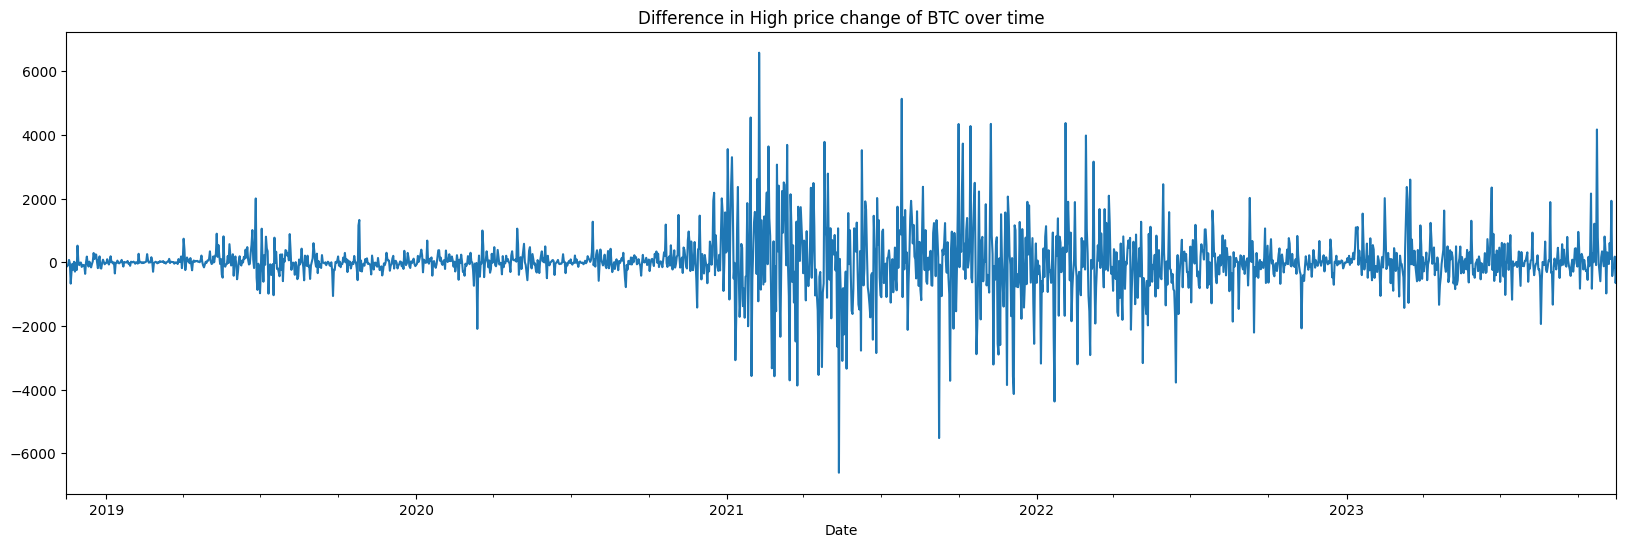

In [7]:
btc_high_diff = btc_data_copy.High.diff()
btc_high_diff.plot(figsize=(20,6))
_ = plt.title('Difference in High price change of BTC over time')

btc_data_copy['Diff in High'] = btc_high_diff
btc_data_copy.head()


Jetzt wird das für die Low Differenz für BTC wiederholt

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Log Returns,Diff in High,Diff in Low
Date,,,,,,,,,,
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN
2018-11-16,5645.319824,5657.020020,5498.939941,5575.549805,5575.549805,5279320000,-0.012833,-0.012916,-117.799804,140.560058
2018-11-17,5578.580078,5578.580078,5519.560059,5554.330078,5554.330078,4303150000,-0.003806,-0.003813,-78.439942,20.620118
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4159680000,0.012461,0.012384,75.029785,40.180175
2018-11-19,5620.779785,5620.779785,4842.910156,4871.490234,4871.490234,7039560000,-0.133732,-0.143561,-32.830078,-716.830078


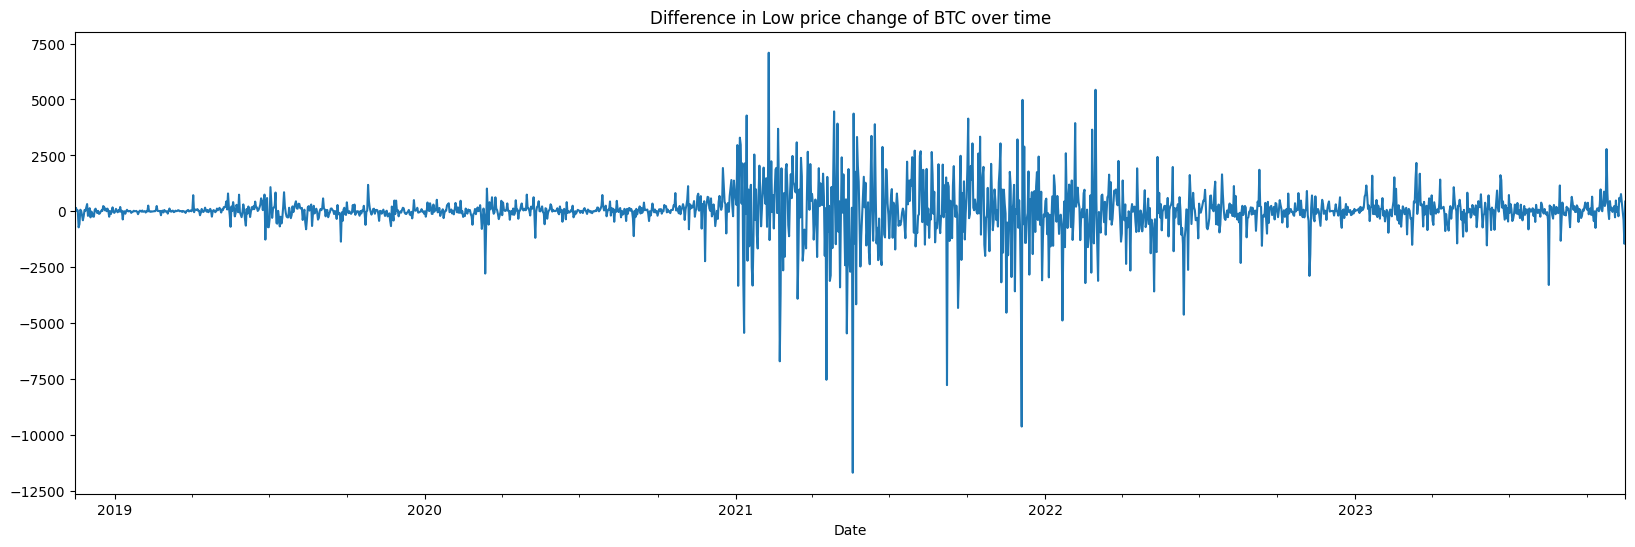

In [8]:
btc_low_diff = btc_data_copy.Low.diff()
btc_low_diff.plot(figsize=(20,6))
_ = plt.title('Difference in Low price change of BTC over time')

btc_data_copy['Diff in Low'] = btc_low_diff
btc_data_copy.head()

Für Zeitreihendaten sind sogenannte Lag Werte sehr interessant. D.h. es werden bspw. die Close Preise von vor einem Tag, vor 3 Tagen oder einem anderen Intervall betrachtet. Das lässt sich natürlich nicht nur mit Close Preisen machen, sondern ist auch für bspw. Renditen relevant.

Im folgenden werden die Gelagten Close Preise und (log) Renditen für 1, 3 & 7 Tage dargestellt und dem Datensatz hinzugefügt.

In [9]:
# Hinzufügen der Lags für Close-Preise
btc_data_copy['Close_Lag_1'] = btc_data_copy['Close'].shift(1)  # 1 Tag
btc_data_copy['Close_Lag_3'] = btc_data_copy['Close'].shift(3)  # 3 Tage
btc_data_copy['Close_Lag_7'] = btc_data_copy['Close'].shift(7)  # 7 Tage

# Hinzufügen der Lags für diskrete Renditen
btc_data_copy['Returns_Lag_1'] = btc_data_copy['Daily Returns'].shift(1)  # 1 Tag
btc_data_copy['Returns_Lag_3'] = btc_data_copy['Daily Returns'].shift(3)  # 3 Tage
btc_data_copy['Returns_Lag_7'] = btc_data_copy['Daily Returns'].shift(7)  # 7 Tage

# Hinzufügen der Lags für Log-Renditen
btc_data_copy['Log_Returns_Lag_1'] = btc_data_copy['Daily Log Returns'].shift(1)  # 1 Tag
btc_data_copy['Log_Returns_Lag_3'] = btc_data_copy['Daily Log Returns'].shift(3)  # 3 Tage
btc_data_copy['Log_Returns_Lag_7'] = btc_data_copy['Daily Log Returns'].shift(7)  # 7 Tage

btc_data_copy.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Log Returns,Diff in High,Diff in Low,Close_Lag_1,Close_Lag_3,Close_Lag_7,Returns_Lag_1,Returns_Lag_3,Returns_Lag_7,Log_Returns_Lag_1,Log_Returns_Lag_3,Log_Returns_Lag_7
Date,,,,,,,,,,,,,,,,,,,
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-16,5645.319824,5657.020020,5498.939941,5575.549805,5575.549805,5279320000,-0.012833,-0.012916,-117.799804,140.560058,5648.029785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-17,5578.580078,5578.580078,5519.560059,5554.330078,5554.330078,4303150000,-0.003806,-0.003813,-78.439942,20.620118,5575.549805,NaN,NaN,-0.012833,NaN,NaN,-0.012916,NaN,NaN
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4159680000,0.012461,0.012384,75.029785,40.180175,5554.330078,5648.029785,NaN,-0.003806,NaN,NaN,-0.003813,NaN,NaN
2018-11-19,5620.779785,5620.779785,4842.910156,4871.490234,4871.490234,7039560000,-0.133732,-0.143561,-32.830078,-716.830078,5623.540039,5575.549805,NaN,0.012461,-0.012833,NaN,0.012384,-0.012916,NaN


Arbeiten mit Candle Sticks: 
Dem Datensatz werden im Folgenden weitere Werte hinzugefügt die auf Candle Sticks beruhen:

Funktion hlco_ratio
Diese Funktion berechnet das Verhältnis zwischen der Preisspanne (Differenz zwischen dem höchsten und niedrigsten Preis) und der Preisdifferenz zwischen Eröffnungs- und Schlusspreis für jede Periode (Tag, Stunde, etc.).

Formel: (High - Low) / (Close - Open)
Zweck: Dieses Verhältnis kann Hinweise auf die Volatilität und die Marktdynamik geben. Ein hoher Wert deutet auf eine große Preisspanne im Verhältnis zur Differenz zwischen Eröffnungs- und Schlusspreis hin, was auf höhere Unsicherheit oder Volatilität hindeuten könnte.

Funktion upper_shadow
Diese Funktion berechnet die Größe des "oberen Schattens" eines Kerzencharts (in der Finanzmarktanalyse).
Formel: High - max(Close, Open)
Zweck: Der obere Schatten ist der Teil einer Kerze in einem Kerzenchart, der über dem höchsten Punkt des Körpers (zwischen Eröffnungs- und Schlusspreis) hinausgeht. Ein langer oberer Schatten kann auf Verkaufsdruck hinweisen.

Funktion lower_shadow
Diese Funktion berechnet die Größe des "unteren Schattens" eines Kerzencharts.
Formel: min(Close, Open) - Low
Zweck: Der untere Schatten ist der Teil einer Kerze in einem Kerzenchart, der unter dem niedrigsten Punkt des Körpers liegt. Ein langer unterer Schatten kann auf Kaufdruck hindeuten.

In [10]:
import numpy as np

def hlco_ratio(df): 
    return (df['High'] - df['Low'])/(df['Close']-df['Open'])

def upper_shadow(df):
    return df['High'] - np.maximum(df['Close'], df['Open'])

def lower_shadow(df):
    return np.minimum(df['Close'], df['Open']) - df['Low']

# Berechnen der Features für jede Zeile und Hinzufügen zum DataFrame
btc_data_copy['Upper_Shadow'] = upper_shadow(btc_data_copy)
btc_data_copy['hlco_ratio'] = hlco_ratio(btc_data_copy)
btc_data_copy['Lower_Shadow'] = lower_shadow(btc_data_copy)

# Anzeige des aktualisierten DataFrames
btc_data_copy.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Log Returns,Diff in High,Diff in Low,...,Close_Lag_7,Returns_Lag_1,Returns_Lag_3,Returns_Lag_7,Log_Returns_Lag_1,Log_Returns_Lag_3,Log_Returns_Lag_7,Upper_Shadow,hlco_ratio,Lower_Shadow
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.669922,-4.725821,289.649902
2018-11-16,5645.319824,5657.020020,5498.939941,5575.549805,5575.549805,5279320000,-0.012833,-0.012916,-117.799804,140.560058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.700196,-2.265731,76.609864
2018-11-17,5578.580078,5578.580078,5519.560059,5554.330078,5554.330078,4303150000,-0.003806,-0.003813,-78.439942,20.620118,...,NaN,-0.012833,NaN,NaN,-0.012916,NaN,NaN,0.000000,-2.433815,34.770019
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4159680000,0.012461,0.012384,75.029785,40.180175,...,NaN,-0.003806,NaN,NaN,-0.003813,NaN,NaN,30.069824,1.471315,0.000000
2018-11-19,5620.779785,5620.779785,4842.910156,4871.490234,4871.490234,7039560000,-0.133732,-0.143561,-32.830078,-716.830078,...,NaN,0.012461,-0.012833,NaN,0.012384,-0.012916,NaN,0.000000,-1.038143,28.580078


Gleitende durchschnittswerte
Simple Moving Average
Expanding Moving Average

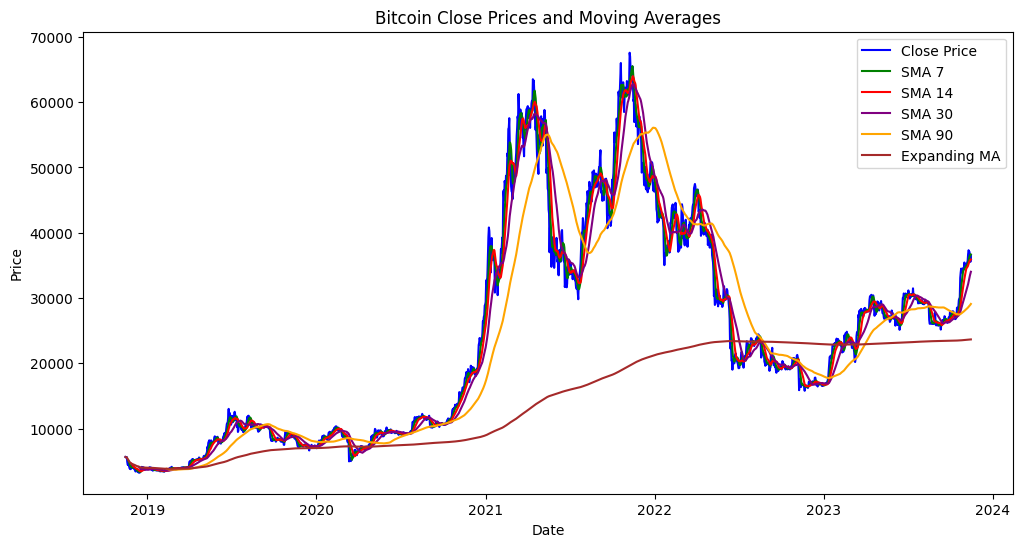

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Log Returns,Diff in High,Diff in Low,...,Log_Returns_Lag_3,Log_Returns_Lag_7,Upper_Shadow,hlco_ratio,Lower_Shadow,SMA_7,SMA_14,SMA_30,SMA_90,EMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
2018-11-16,5645.319824,5657.020020,5498.939941,5575.549805,5575.549805,5279320000,-0.012833,-0.012916,-117.799804,140.560058,...,NaN,NaN,11.700196,-2.265731,76.609864,NaN,NaN,NaN,NaN,5611.789795
2018-11-17,5578.580078,5578.580078,5519.560059,5554.330078,5554.330078,4303150000,-0.003806,-0.003813,-78.439942,20.620118,...,NaN,NaN,0.000000,-2.433815,34.770019,NaN,NaN,NaN,NaN,5592.636556
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4159680000,0.012461,0.012384,75.029785,40.180175,...,NaN,NaN,30.069824,1.471315,0.000000,NaN,NaN,NaN,NaN,5600.362427
2018-11-19,5620.779785,5620.779785,4842.910156,4871.490234,4871.490234,7039560000,-0.133732,-0.143561,-32.830078,-716.830078,...,-0.012916,NaN,0.000000,-1.038143,28.580078,NaN,NaN,NaN,NaN,5454.587988


In [11]:
# Berechnung der gleitenden Durchschnittswerte (Simple Moving Averages) und Expanding Moving Average
btc_data_copy['SMA_7'] = btc_data_copy['Close'].rolling(window=7).mean()
btc_data_copy['SMA_14'] = btc_data_copy['Close'].rolling(window=14).mean()
btc_data_copy['SMA_30'] = btc_data_copy['Close'].rolling(window=30).mean()
btc_data_copy['SMA_90'] = btc_data_copy['Close'].rolling(window=90).mean()
btc_data_copy['EMA'] = btc_data_copy['Close'].expanding().mean()

# Visualisierung der Close-Preise und der gleitenden Durchschnittswerte
plt.figure(figsize=(12, 6))
plt.plot(btc_data_copy['Close'], label='Close Price', color='blue')
plt.plot(btc_data_copy['SMA_7'], label='SMA 7', color='green')
plt.plot(btc_data_copy['SMA_14'], label='SMA 14', color='red')
plt.plot(btc_data_copy['SMA_30'], label='SMA 30', color='purple')
plt.plot(btc_data_copy['SMA_90'], label='SMA 90', color='orange')
plt.plot(btc_data_copy['EMA'], label='Expanding MA', color='brown')

plt.title('Bitcoin Close Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

btc_data_copy.head()

Bevor der Datensatz für das Training eines Machine Learning Algorithmus verwendet wird, sollte für besser Performance die Date Spalte in Timestamps umgewandelt werden und anschließend als Index genutzt werden.

Um ein "Gefühl" für die Stimmung am Markt zu bekommen wird im folgenden Versucht Informationen über BTC Future Contracte zu nutzen.

In [39]:
# Pfad zum neuen DataFrame (ersetzen Sie diesen durch Ihren eigenen Pfad)
new_df_path = r'C:\Users\silas\OneDrive\Desktop\Bachelor Thesis\Model tests und Code\aggregated_futures_data_freq_d.csv'

# Laden des neuen DataFrames
btc_daily_future_contract_hist_data = pd.read_csv(new_df_path)

btc_data_copy.head()

,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Log Returns,Diff in High,Diff in Low,Close_Lag_1,...,Log_Returns_Lag_3,Log_Returns_Lag_7,Upper_Shadow,hlco_ratio,Lower_Shadow,SMA_7,SMA_14,SMA_30,SMA_90,EMA
Open,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785


Im folgenden Schritt soll das Dataframe welches die Daten über den BTC Future Contract enthält mit dem Dataframe welches die Spot-Daten enthält verglichen werden.

In [34]:
btc_data_copy.head()

,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Log Returns,Diff in High,Diff in Low,Close_Lag_1,...,Log_Returns_Lag_3,Log_Returns_Lag_7,Upper_Shadow,hlco_ratio,Lower_Shadow,SMA_7,SMA_14,SMA_30,SMA_90,EMA
Open,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785


In [29]:
btc_data_copy.head()

,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Log Returns,Diff in High,Diff in Low,Close_Lag_1,...,Log_Returns_Lag_3,Log_Returns_Lag_7,Upper_Shadow,hlco_ratio,Lower_Shadow,SMA_7,SMA_14,SMA_30,SMA_90,EMA
Open,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
1970-01-01 00:00:05.736149902,5774.819824,5358.379883,5648.029785,5648.029785,7032140000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.669922,-4.725821,289.649902,NaN,NaN,NaN,NaN,5648.029785
